<a href="https://colab.research.google.com/github/Njeriee/machine_learning_series/blob/main/regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# import sklearn as

In [ ]:
d = pd.read_csv("/content/data.csv")
d.head()

,x,y,z
0,180,433,a
1,180,435,a
2,181,437,a
3,187,438,a
4,197,441,a


In [ ]:
d.shape

(517, 3)

In [ ]:
d.dtypes

x     int64
y     int64
z    object
dtype: object

In [ ]:
# extracting the features of the data
X = d[['x','y']]
X.head()

,x,y
0,180,433
1,180,435
2,181,437
3,187,438
4,197,441


In [ ]:
# extracting the label (what will be predicted)
y = d['z']
y.tail()

512    c
513    c
514    c
515    c
516    c
Name: z, dtype: object

In [ ]:
# sklearn has modules for spliting data into batches for training and testing as well as a preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# the StandardScaler function is used to normalize/standardize data such that it has a mean 0 and a unit sd

In [ ]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)

(387, 2)
(130, 2)


In [ ]:
# initiate standard scaler object
scaler = StandardScaler().fit(X_train)
scaler2 = StandardScaler().fit(X_test)

scaler.mean_
scaler.scale_

array([139.23123895, 105.23108912])

In [ ]:
# transforming X-train data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# returns a numpy array
print(X_train_scaled[0:5])
print(X_test_scaled[0:5])

[[-1.0358096  -0.33134901]
 [-0.10211109 -0.39786927]
 [-0.19548095  0.94203893]
 [-0.51868428 -1.79479485]
 [-1.07172108  1.07507946]]
[[ 0.19236305 -0.23632006]
 [-1.63194019  1.20812   ]
 [-1.89768515  0.79949551]
 [-1.2225493   1.53121843]
 [-1.6175756   0.2293218 ]]


In [ ]:
# encoding the labels since they are strings
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')  # Handle potential new categories
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

print(y_train_encoded[0:5])
y_train_encoded.shape

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 0)	1.0


(387, 3)

In [ ]:
# lets try and use linear regression to model the data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train_encoded.toarray())
# predict
predictions = model.predict(X_test)
print(predictions)
predictions.shape


[[ 0.29656198  0.33970031  0.36373771]
 [ 1.02327671  0.27570567 -0.29898238]
 [ 1.02298146  0.28261678 -0.30559824]
 [ 0.97118781  0.27309377 -0.24428157]
 [ 0.85165567  0.30157866 -0.15323433]
 [ 0.46673177  0.32833786  0.20493037]
 [ 0.23507713  0.34706128  0.41786159]
 [-0.2101811   0.39009828  0.82008283]
 [-0.22130708  0.37194404  0.84936305]
 [-0.02258725  0.34266939  0.67991786]
 [-0.22753575  0.38254597  0.84498977]
 [ 0.48895574  0.33867131  0.17237295]
 [ 0.3974331   0.32297623  0.27959067]
 [ 0.77906432  0.28725666 -0.06632097]
 [-0.14859884  0.36509359  0.78350525]
 [-0.04503101  0.38766836  0.65736266]
 [ 0.49264108  0.32307687  0.18428205]
 [-0.03942083  0.36491361  0.67450722]
 [ 0.1351532   0.37848584  0.48636096]
 [ 0.83033142  0.2834994  -0.11383082]
 [ 0.99753724  0.26572424 -0.26326148]
 [ 0.30033375  0.33949467  0.36017158]
 [ 0.51238018  0.31783159  0.16978824]
 [ 0.36442037  0.32653997  0.30903966]
 [-0.04951318  0.37684864  0.67266454]
 [-0.10149617  0.3860968 

(130, 3)

In [ ]:
# reverse the encoding
inverse_predictions = encoder.inverse_transform(predictions)
print(inverse_predictions)

[['c']
 ['a']
 ['a']
 ['a']
 ['a']
 ['a']
 ['c']
 ['c']
 ['c']
 ['c']
 ['c']
 ['a']
 ['a']
 ['a']
 ['c']
 ['c']
 ['a']
 ['c']
 ['c']
 ['a']
 ['a']
 ['c']
 ['a']
 ['a']
 ['c']
 ['c']
 ['c']
 ['c']
 ['c']
 ['a']
 ['a']
 ['c']
 ['a']
 ['a']
 ['a']
 ['c']
 ['c']
 ['a']
 ['a']
 ['c']
 ['a']
 ['a']
 ['c']
 ['c']
 ['c']
 ['a']
 ['a']
 ['c']
 ['c']
 ['c']
 ['a']
 ['a']
 ['a']
 ['a']
 ['a']
 ['a']
 ['a']
 ['c']
 ['c']
 ['c']
 ['a']
 ['a']
 ['c']
 ['c']
 ['a']
 ['c']
 ['c']
 ['c']
 ['c']
 ['c']
 ['c']
 ['a']
 ['c']
 ['a']
 ['a']
 ['c']
 ['a']
 ['a']
 ['c']
 ['a']
 ['a']
 ['c']
 ['c']
 ['c']
 ['a']
 ['c']
 ['c']
 ['c']
 ['a']
 ['c']
 ['c']
 ['c']
 ['c']
 ['c']
 ['a']
 ['c']
 ['a']
 ['c']
 ['c']
 ['a']
 ['c']
 ['a']
 ['c']
 ['a']
 ['b']
 ['a']
 ['a']
 ['a']
 ['a']
 ['a']
 ['c']
 ['a']
 ['a']
 ['c']
 ['c']
 ['a']
 ['a']
 ['c']
 ['a']
 ['c']
 ['a']
 ['c']
 ['a']
 ['c']
 ['a']
 ['a']
 ['c']
 ['a']
 ['c']
 ['a']]


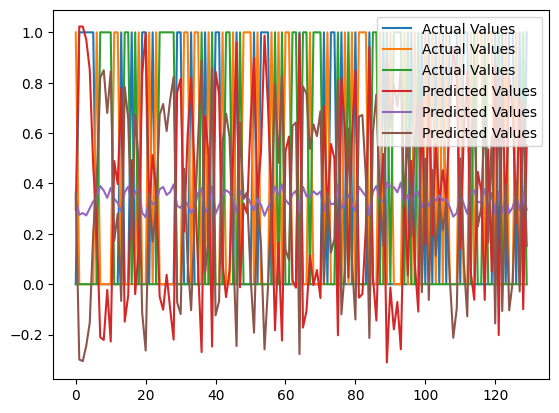

In [ ]:
# checking the accuracy of the model
import matplotlib.pyplot as plt

plt.plot(y_test_encoded.toarray(), label="Actual Values")
plt.plot(predictions, label="Predicted Values")
plt.legend()
plt.show()

In [ ]:
`